In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mK as mK
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2
from TO_sim.Get_groups import phase_diagram,make_meanr

from TO_sim.gen_Distribution import Normal
from TO_sim.gen_Distribution import Quantile_Normal as Q_Normal
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from tqdm.notebook import tqdm
from scipy.signal import find_peaks
import parmap

In [150]:
seed =10
N = 500
theta_random,omega,Kc = Normal(N,0,1,seed=seed)
omega = omega - np.mean(omega)
omega = np.sort(omega)
m = 6
t = np.arange(0,5000,0.1)
K = 4.1
to_ppi = lambda y: (y + np.pi)%(2*np.pi) - np.pi
theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_random,p_dtheta= omega,p_omega=omega)
new_theta = to_ppi(theta)
dtheta_c = np.cumsum(dtheta,axis=0)
sum_time = 1000
avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time

In [151]:
def get_cluster(peaks,num):
    peaks = peaks[np.where((peaks<N)&(peaks>1))]
    peaks_new = [peaks[0],*peaks]
    psize = np.diff(peaks_new)
    arg_psize = np.argsort(psize)[::-1] 
    c_l,c_r = arg_psize[num],arg_psize[num]+1
    cluster = np.array([peaks_new[c_l],peaks_new[c_r]])
    size = np.diff(np.array([peaks_new[c_l],peaks_new[c_r]]))
    return cluster,size



def near_main(peaks):
    num = 0
    peaks = peaks[np.where((peaks<N)&(peaks>1))]
    peaks_new = [peaks[0],*peaks]
    psize = np.diff(peaks_new)
    arg_psize = np.argsort(psize)[::-1] 
    left_l,left_r = arg_psize[num]-1,arg_psize[num]
    l_cluster = np.array([peaks_new[left_l],peaks_new[left_r]])
    
    right_l,right_r = arg_psize[num]+1,arg_psize[num]+2
    r_cluster = np.array([peaks_new[right_l],peaks_new[right_r]])
    return l_cluster,r_cluster


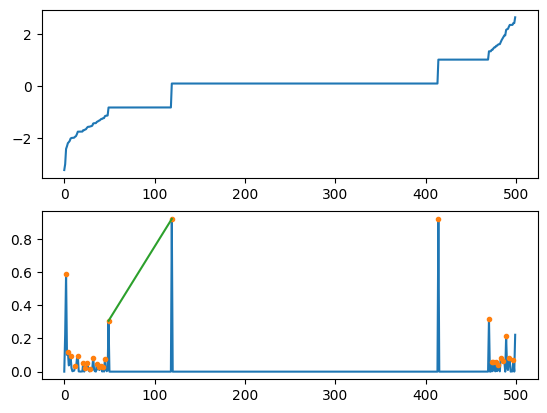

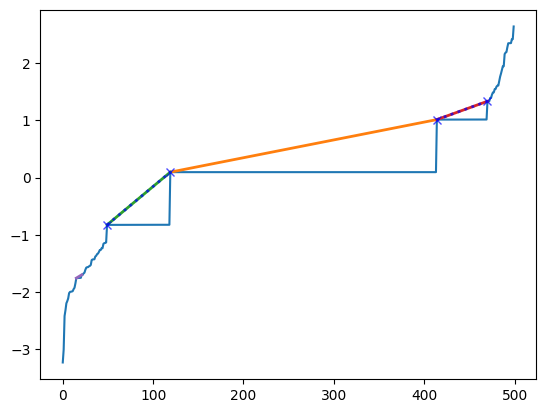

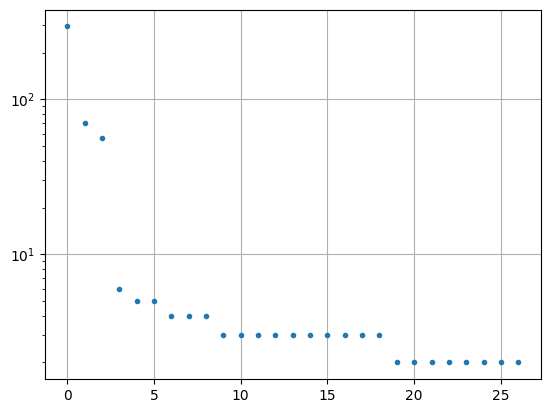

In [152]:
plt.subplot(211)
index = -1
arg = np.argsort(avg_dtheta[index])
SD = avg_dtheta[index][arg]
plt.plot(SD)
# plt.plot(avg_dtheta[1500])

plt.subplot(212)

diff_dtheta = np.diff([SD[0],*SD])

plt.plot(diff_dtheta)
peaks, P  = find_peaks(diff_dtheta, height=0.01)
HP = P['peak_heights']
# peaks = peaks[p_arg]
# peaks = peaks[np.where((peaks<N)&(peaks>1))]

# peaks_new = [peaks[0],*peaks]
# psize = np.diff(peaks_new)
# arg_psize = np.argsort(psize)[::-1] 
C_0,S_0 = get_cluster(peaks,0)
C_1,S_1 = get_cluster(peaks,1)
C_2,S_2 = get_cluster(peaks,2)
C_3,S_3 = get_cluster(peaks,3)
l_c,r_c = near_main(peaks)
max_s = np.sort(diff_dtheta[peaks])[::-1][:2]
# plt.plot(0.01/diff_dtheta)
plt.plot(peaks,diff_dtheta[peaks],'.')
plt.plot(C_1,diff_dtheta[np.array(C_1)])
# plt.yscale('log')

# plt.ylim(0,10)
plt.figure()

SD = avg_dtheta[index][arg]
plt.plot(SD)
plt.plot(np.arange(N)[np.array(C_0)],SD[np.array(C_0)],lw=2,ls='-')
plt.plot(np.arange(N)[np.array(C_1)],SD[np.array(C_1)],lw=2,ls='-')
plt.plot(np.arange(N)[np.array(C_2)],SD[np.array(C_2)],lw=2,ls='-')
plt.plot(np.arange(N)[np.array(C_3)],SD[np.array(C_3)],lw=2,ls='-')
plt.plot(np.arange(N)[l_c],SD[l_c],lw=2,ls=':',color ='blue',alpha=0.7,marker='x')
plt.plot(np.arange(N)[r_c],SD[r_c],lw=2,ls=':',color ='blue',alpha=0.7,marker='x')
plt.figure()
plt.plot(np.sort(np.diff(peaks))[::-1],'.')
plt.yscale('log')

plt.grid()

In [153]:
len(t)-1000

49000

In [154]:
cm,cl,cr = [], [],[]
Om,Ol,Or = [], [],[]
Sm,Sl,Sr = [], [],[]


c1,c2 = [], []
O1,O2 = [], []
S1,S2 = [], []

for i in range(len(t)-sum_time-1000,len(t)-sum_time):
    index = i
    arg = np.argsort(avg_dtheta[index])
    SD = avg_dtheta[index][arg]
    diff_dtheta = np.diff([SD[0],*SD])
    peaks, P  = find_peaks(diff_dtheta, height=0.01)
    C_0,S_0 = get_cluster(peaks,0)
    C_1,S_1 = get_cluster(peaks,1)
    C_2,S_2 = get_cluster(peaks,2)
    l_c,r_c = near_main(peaks)
    cluster_0 = arg[C_0[0]:C_0[1]]
    cluster_1 = arg[C_1[0]:C_1[1]]
    cluster_2 = arg[C_2[0]:C_2[1]]
    cluster_l = arg[l_c[0]:l_c[1]]
    cluster_r = arg[r_c[0]:r_c[1]]
    O_m = np.mean(avg_dtheta[index][cluster_0])
    O_1 = np.mean(avg_dtheta[index][cluster_1])
    O_2 = np.mean(avg_dtheta[index][cluster_2])
    O_l = np.mean(avg_dtheta[index][cluster_l])
    O_r = np.mean(avg_dtheta[index][cluster_r])
    std_m = np.std(avg_dtheta[index][cluster_0])
    std_l = np.std(avg_dtheta[index][cluster_l])
    std_r = np.std(avg_dtheta[index][cluster_r])
    std_1 = np.std(avg_dtheta[index][cluster_1])
    std_2 = np.std(avg_dtheta[index][cluster_2])
    
    cm.append(len(cluster_0))
    c1.append(len(cluster_1))
    c2.append(len(cluster_2))
    cl.append(len(cluster_l))
    cr.append(len(cluster_r))
    Om.append(O_m)
    O1.append(O_1)
    O2.append(O_2)
    Ol.append(O_l)
    Or.append(O_r)
    
    Sm.append(std_m)
    S1.append(std_1)
    S2.append(std_2)
    Sl.append(std_l)
    Sr.append(std_r)

In [155]:
np.std(cm),np.std(cl),np.std(cr),np.std(c1),np.std(c2)

(0.0, 0.0, 0.0, 0.0, 0.0)

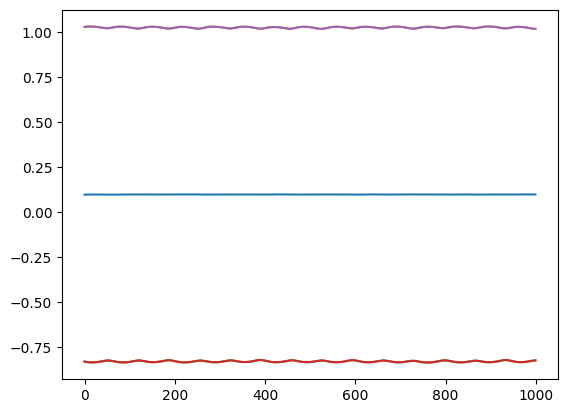

In [156]:
plt.plot(Om)
plt.plot(Or)
plt.plot(Ol)

plt.plot(O1)
plt.plot(O2)


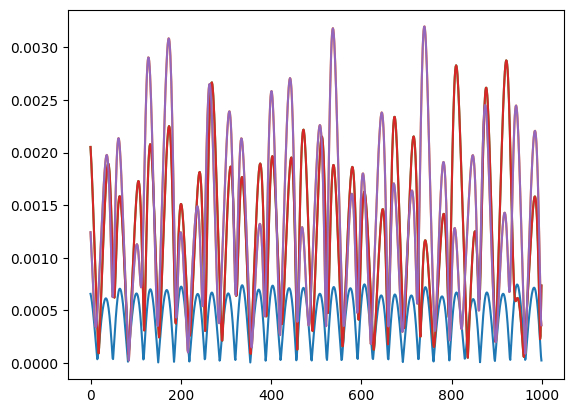

In [157]:
plt.plot(Sm)
plt.plot(Sr)
plt.plot(Sl)
plt.plot(S1)
plt.plot(S2)

In [148]:
# cluster를 확인해 볼때, 양옆의 클러스터가 계속적으로 유지되어야 의미가 있기 때문에
# 개수가 변하면은 클러스터가 없다고 생각하고 0으로 바꾸는 코드로 수정을 해야 할듯